<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #ebe6eb; font-size:110%; text-align:left">

<h2 align="left"><font color='purple'>Assignment:</font></h2>

The assignment is about building a classification model for tennis serve to be ace/not

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:120%; text-align:left">
<a id="contents_tabel"></a>
<h2 align="left"><font color='purple'>Table of Contents:</font></h2>

* Step 1 | Import Libraries
* Step 2 | Load Data
* Step 3 | Data Exploration
    - Step 3.1 | Basic Exploration
    - Step 3.2 | Visualisation of Data
      - Disribution of Categorical data
      - Disribution of Numerical data
* Step 4 | Handling Null values]
* Step 5 | Data Quality check and handling(if any)
* Step 6 | Categorical Feautre Encoding
* Step 7 | Correlation Analysis
* Step 8 | Train-Test Split
* Step 9 | XG Boost Model Building and parameter tuning
* Step 10 | XG Boost Model Run and Evaluation
* Step 11 | Predict sample data points


# Step 1 | Import Libraries

In [ ]:
# When this exception is raised, AttributeError: 'super' object has no attribute '__sklearn_tags__'
# https://github.com/scikit-learn/scikit-learn/issues/30542
# !pip uninstall -y scikit-learn
# !pip install scikit-learn==1.5.2

In [ ]:
!python --version

Python 3.11.11


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from xgboost import XGBClassifier, callback

# Step 2 | Load Data

In [ ]:
df = pd.read_csv("./data/task_set.csv")

#Step 3 | Data Exploration

## Step 3.1 | Basic Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187926 entries, 0 to 187925
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   surface            187926 non-null  object 
 1   serve_side         187926 non-null  object 
 2   serve_number       187926 non-null  int64  
 3   ball_hit_y         187817 non-null  float64
 4   ball_hit_x         187817 non-null  float64
 5   ball_hit_z         187817 non-null  float64
 6   ball_hit_v         187807 non-null  float64
 7   ball_net_v         187797 non-null  float64
 8   ball_net_z         187809 non-null  float64
 9   ball_net_y         187810 non-null  float64
 10  ball_bounce_x      187817 non-null  float64
 11  ball_bounce_y      187817 non-null  float64
 12  ball_bounce_v      187809 non-null  float64
 13  ball_bounce_angle  187816 non-null  float64
 14  hitter_x           187810 non-null  float64
 15  hitter_y           187810 non-null  float64
 16  re

In [ ]:
df.head()

,surface,serve_side,serve_number,ball_hit_y,ball_hit_x,ball_hit_z,ball_hit_v,ball_net_v,ball_net_z,ball_net_y,...,ball_bounce_y,ball_bounce_v,ball_bounce_angle,hitter_x,hitter_y,receiver_x,receiver_y,hitter_hand,receiver_hand,is_ace
0,hard,deuce,2,1.459,11.445,2.830,91.5,67.9,1.241,-0.980,...,-2.278,60.7,19.216,11.739,1.398,-13.343,-3.570,right,left,0
1,hard,ad,1,1.083,-11.228,2.817,125.5,97.7,1.019,-0.026,...,-0.618,88.8,12.428,-11.744,1.131,15.459,-4.067,left,right,0
2,hard,deuce,1,0.835,11.149,2.793,109.7,85.5,1.156,-2.082,...,-3.744,75.3,12.737,11.538,0.647,-13.679,-3.544,right,right,0
3,clay,ad,2,-1.424,11.488,2.727,97.1,74.1,1.095,1.170,...,1.853,68.1,17.743,11.690,-1.169,-11.378,3.402,right,right,0
4,hard,ad,1,0.472,-10.985,2.660,121.0,95.7,1.094,-0.301,...,-0.525,85.5,12.013,-11.508,0.559,14.323,-3.629,right,right,0


In [ ]:
df.isnull().sum()

,0
surface,0
serve_side,0
serve_number,0
ball_hit_y,109
ball_hit_x,109
ball_hit_z,109
ball_hit_v,119
ball_net_v,129
ball_net_z,117
ball_net_y,116


In [ ]:
df.describe(include='number')

,serve_number,ball_hit_y,ball_hit_x,ball_hit_z,ball_hit_v,ball_net_v,ball_net_z,ball_net_y,ball_bounce_x,ball_bounce_y,ball_bounce_v,ball_bounce_angle,hitter_x,hitter_y,receiver_x,receiver_y,is_ace
count,187926.000000,187817.000000,187817.000000,187817.000000,187807.000000,187797.000000,187809.000000,187810.000000,187817.000000,187817.000000,187809.000000,187816.000000,187810.000000,187810.000000,187717.000000,187717.00000,187926.000000
mean,1.356635,-0.003056,0.025959,2.842908,108.650497,85.511926,1.177421,-0.002502,-0.015045,-0.002121,75.887740,14.625971,0.073049,-0.034099,-0.044800,-0.01033,0.080585
std,0.479007,1.148724,11.362744,0.147901,15.495405,13.023081,0.162155,1.392535,5.146167,2.415050,12.496144,3.643096,11.671999,1.167514,14.066468,3.67635,0.272197
min,1.000000,-7.593000,-19.079000,-0.006000,2.800000,0.000000,-21.292000,-9.194000,-27.580000,-9.170000,0.000000,0.000000,-19.997000,-7.819000,-19.961000,-8.01000,0.000000
25%,1.000000,-1.028000,-11.371000,2.772000,96.700000,75.200000,1.084000,-1.103000,-5.086000,-2.062000,66.600000,12.191000,-11.669000,-1.088000,-14.077000,-3.67300,0.000000
50%,1.000000,-0.035000,9.600000,2.844000,109.700000,86.400000,1.163000,-0.002000,-3.180000,0.000000,76.400000,14.052000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,2.000000,1.024000,11.371000,2.918000,121.100000,96.000000,1.250000,1.112000,5.082000,2.078000,85.700000,16.969000,11.727000,1.028000,14.053000,3.65100,0.000000
max,2.000000,6.511000,17.802000,4.213000,195.300000,163.000000,11.637000,8.563000,23.332000,8.319000,164.600000,90.000000,19.709000,8.007000,19.989000,8.25900,1.000000


In [ ]:
df.describe(include="object")

,surface,serve_side,hitter_hand,receiver_hand
count,187926,187926,187926,187926
unique,3,2,2,2
top,hard,deuce,right,right
freq,132826,98186,163951,164117


## Step 3.2 | Visualisation of Data

### Disribution of Categorical data

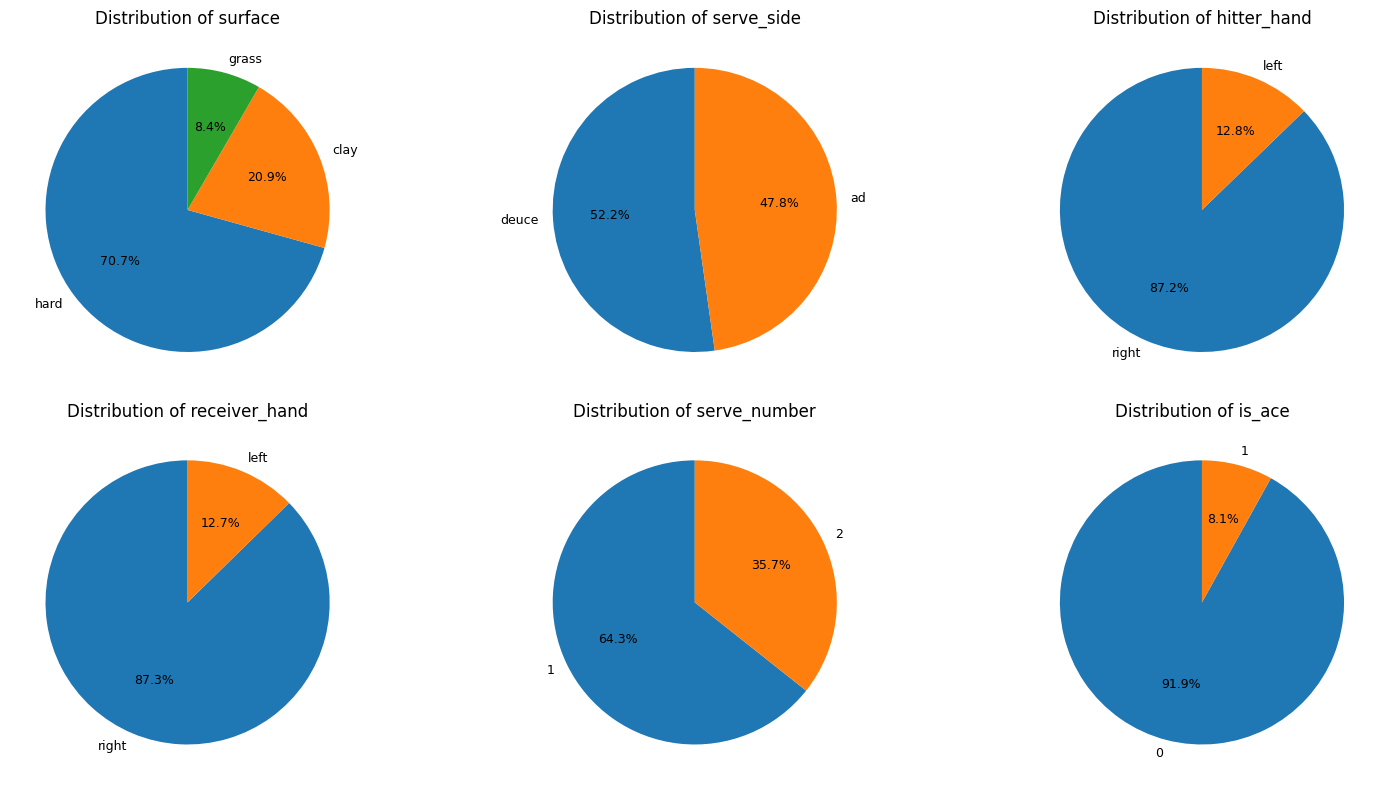

In [ ]:
num_plots_per_row = 3

categorical_columns = df.select_dtypes(include=['object']).columns.to_list()
categorical_columns += ['serve_number', 'is_ace']
num_categorical_cols = len(categorical_columns)

fig, axes = plt.subplots(
    nrows=(num_categorical_cols // num_plots_per_row) + (num_categorical_cols % num_plots_per_row > 0),
    ncols=num_plots_per_row,
    figsize=(16, 8)
)

axes = axes.flatten()

for idx, column in enumerate(categorical_columns):
    value_counts = df[column].value_counts()
    labels = value_counts.index
    sizes = value_counts.values

    # Plot pie chart
    wedges, texts, autotexts = axes[idx].pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 9}
    )
    axes[idx].set_title(f'Distribution of {column}', fontsize=12)

# Hide unused subplots
for idx in range(len(categorical_columns), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

### Distribution of Numerical data

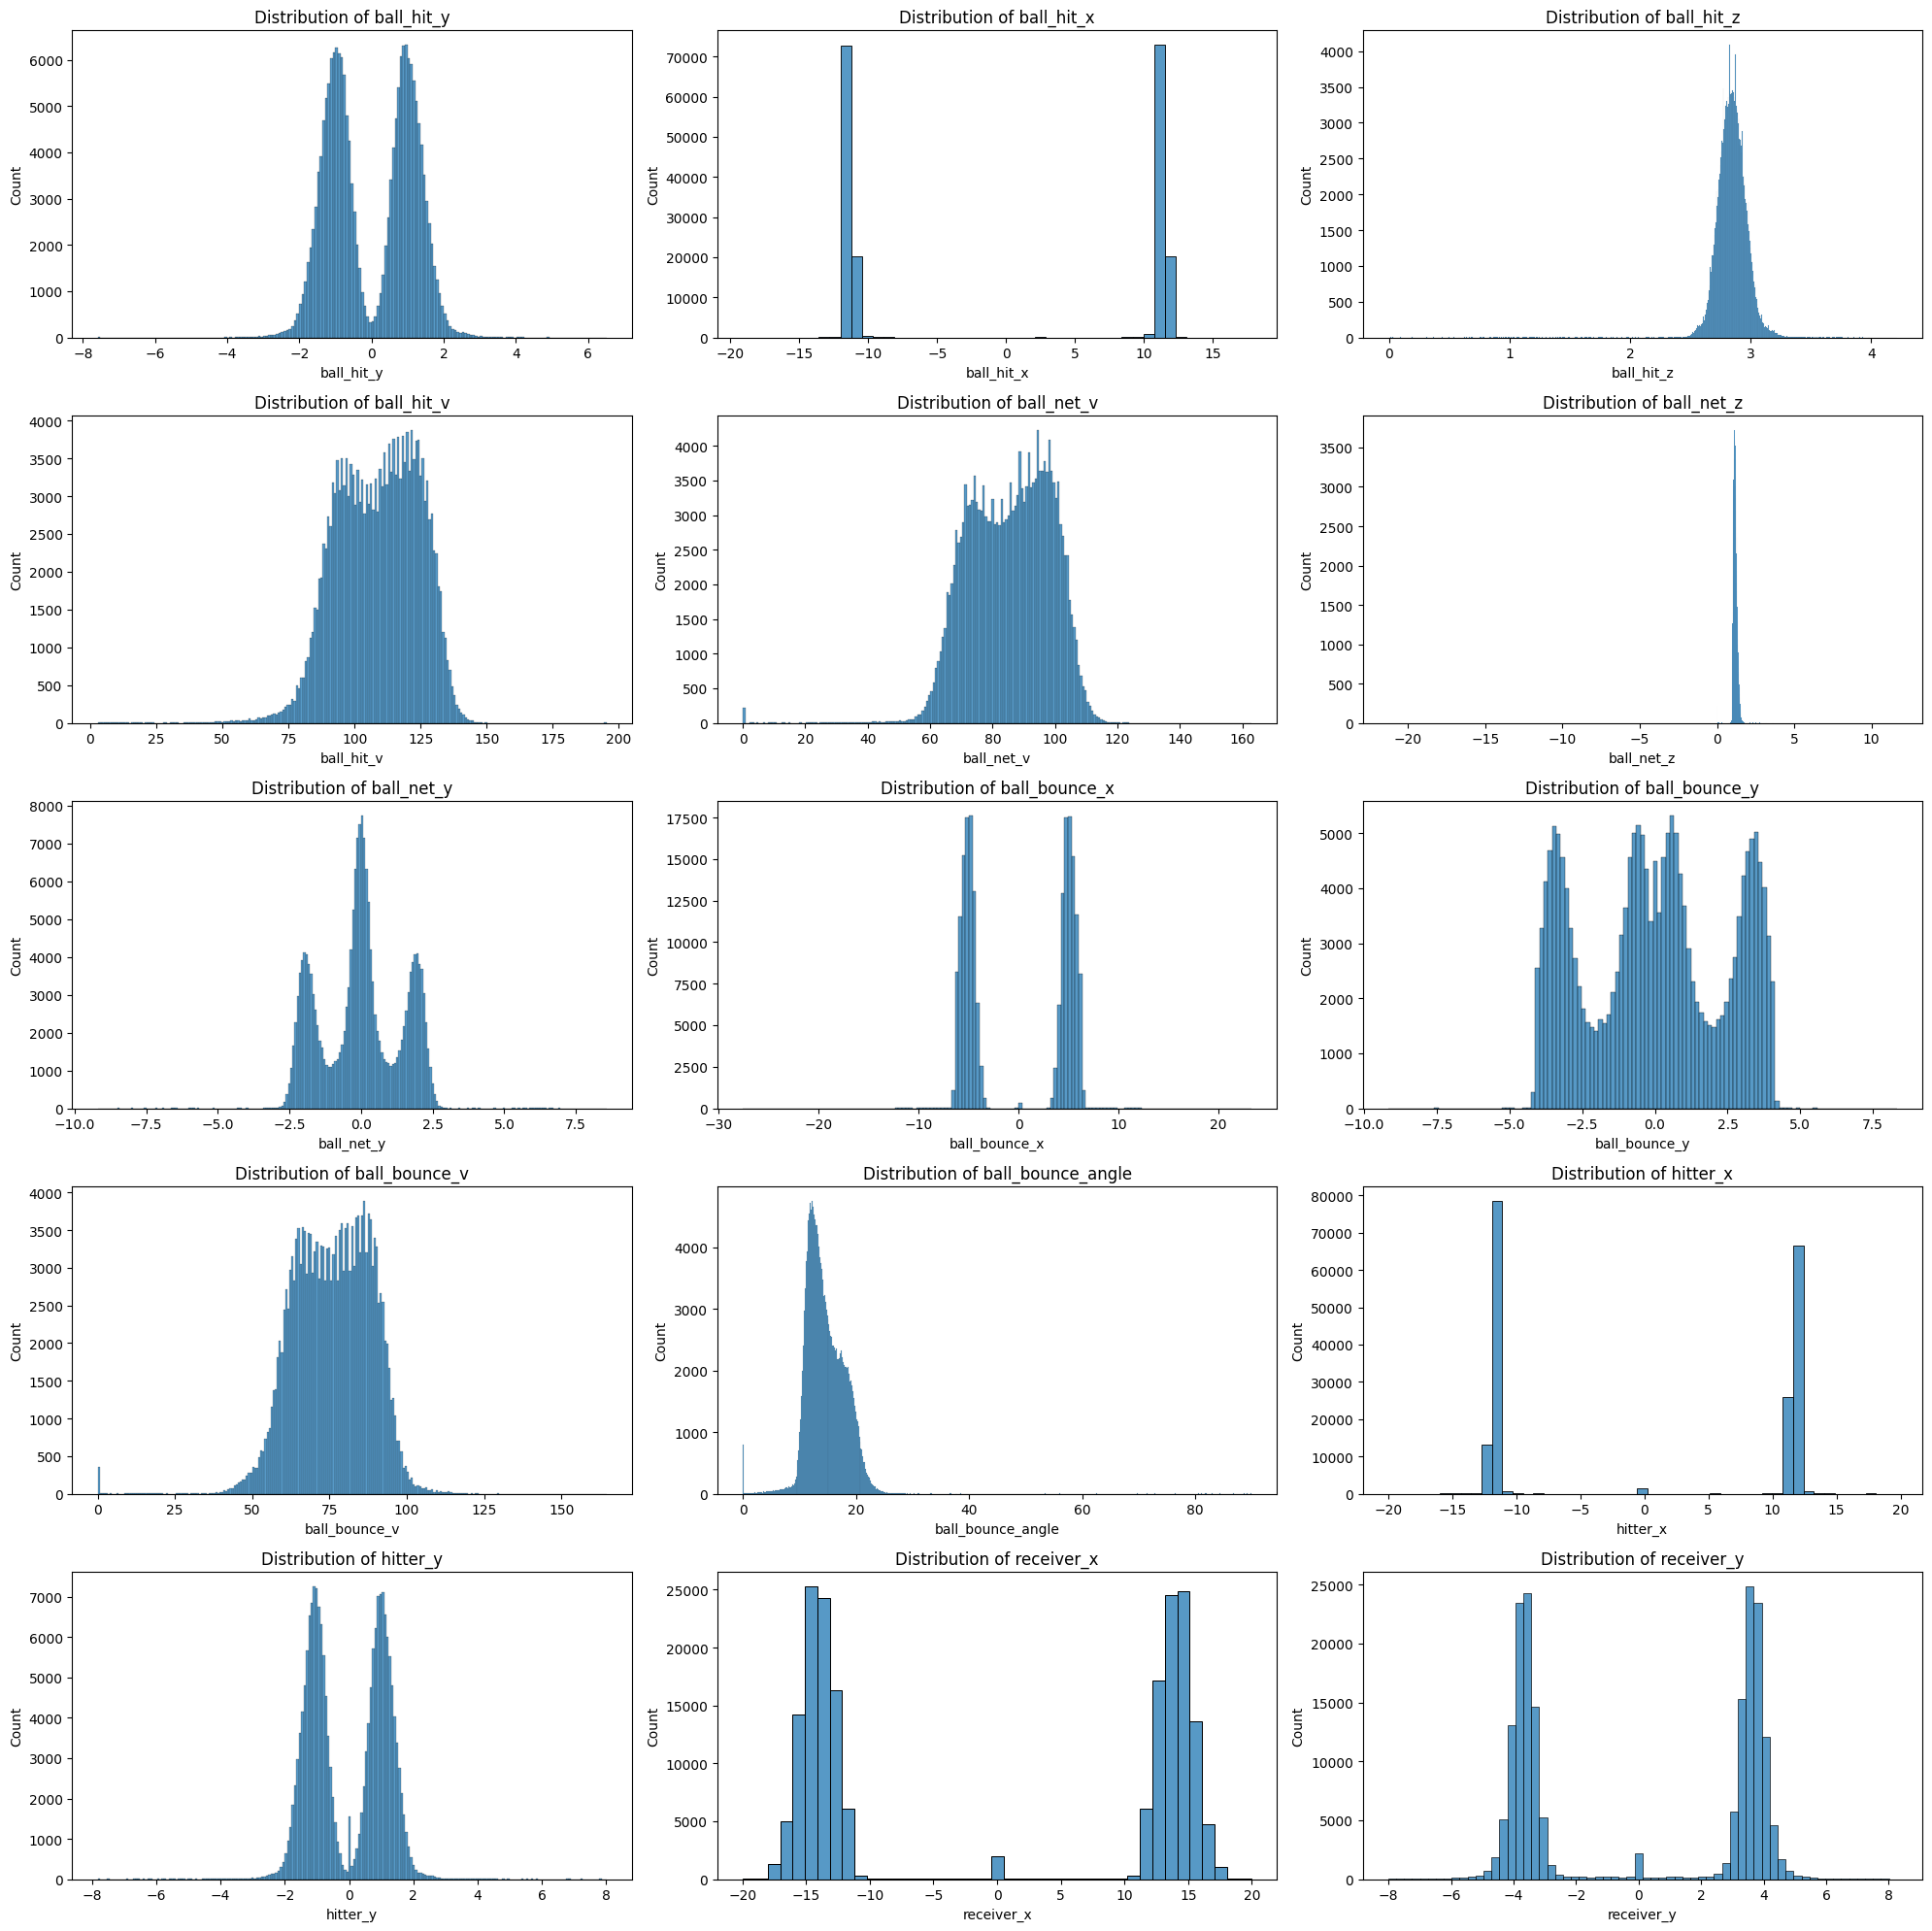

In [ ]:
num_plots_per_row = 3

numeric_columns = df.select_dtypes(include=['number']).columns.to_list()
numeric_columns.remove('serve_number')
numeric_columns.remove('is_ace')

num_numeric_cols = len(numeric_columns)
fig, axes = plt.subplots(
    nrows=(num_numeric_cols // num_plots_per_row) + (num_numeric_cols % num_plots_per_row > 0),
    ncols=num_plots_per_row,
    figsize=(20, 20)
)

axes = axes.flatten()  # Flatten for easier indexing
for idx, column in enumerate(numeric_columns):
    sns.histplot(df[column], kde=False, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {column}')

# Hide empty subplots
for idx in range(len(numeric_columns), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


# Step 4 | Handling Null values

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

<h3 align="left"><font color='purple'>Notes:</font></h3>

* By domain knowledge, we know that for the balls that are landing in there will be some of the non-zero features.
* Those features are __'ball_hit_z', 'ball_hit_v', 'ball_net_v', 'ball_net_z', 'ball_bounce_x', 'ball_bounce_v', 'ball_bounce_angle', 'hitter_x', 'hitter_y'__
* If there are zero values in the feautes we will treat them as NaN

In [ ]:
features_with_non_expected_zero_values = ['ball_hit_z', 'ball_hit_v', 'ball_net_v', 'ball_net_z',
                                          'ball_bounce_x', 'ball_bounce_v', 'ball_bounce_angle',
                                          'hitter_x', 'hitter_y']
for col in features_with_non_expected_zero_values:
  df[col] = df[col].replace(0, np.nan)

In [ ]:
#Create a new column 'null_count' to see if there are data points with many null values
df['null_count'] = df.isnull().sum(axis=1)
df['null_count'].value_counts().sort_index()

,count
null_count,
0,185493
1,451
2,1512
3,161
4,12
5,184
7,4
13,11
15,98


In [ ]:
# The data points that have most nulls can be deleted
#Drop records with most null values which contains the ball_bounce_x, etc
df = df[df['null_count'] <= 7].copy()
df.drop('null_count', axis=1, inplace=True)
df.shape

(187817, 21)

In [ ]:
# Check for missing values
print(df.isnull().sum())

surface                 0
serve_side              0
serve_number            0
ball_hit_y              0
ball_hit_x              0
ball_hit_z              0
ball_hit_v             10
ball_net_v            232
ball_net_z            220
ball_net_y              7
ball_bounce_x         342
ball_bounce_y           0
ball_bounce_v         361
ball_bounce_angle     781
hitter_x             1389
hitter_y             1390
receiver_x            111
receiver_y            111
hitter_hand             0
receiver_hand           0
is_ace                  0
dtype: int64


<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

<h3 align="left"><font color='purple'>Notes:</font></h3>

* The features _ball_hit_v, ball_net_v, ball_net_z, ball_net_y, ball_bounce_x, ball_bounce_v, ball_bounce_angle, hitter_x, hitter_y, receiver_x, receiver_y_ have null values
* Some of the above feautre are related to ball dynamics and some other related to player coordinates
* __Null features with ball dynamics:__ _'ball_hit_v', 'ball_net_v', 'ball_net_z', 'ball_net_y', 'ball_bounce_x', 'ball_bounce_v', 'ball_bounce_angle'._
  These features can be imputed based on _server_side(deuce and ad)_ as ball dynamics differ depending on the serve placement and take the median of the of the subset(deuce/ad)
* __Null features with player coordinates:__ _'hitter_x', 'hitter_y', 'receiver_x', 'receiver_y'._ These features can be imputed  based on _ball_hit_x and ball_hit_y_ as there is a strong relation between hitter/reciever coordinates and the ball_hit_x and ball_hit_y

In [ ]:
# Fill ball-related dynamics
for col in ['ball_hit_v', 'ball_net_v', 'ball_net_z', 'ball_net_y', 'ball_bounce_x', 'ball_bounce_v', 'ball_bounce_angle']:
    df.loc[df['serve_side'] == "deuce", col] = df.loc[df['serve_side'] == "deuce", col].fillna(
        df.loc[df['serve_side'] == "deuce", col].median()
    )
    df.loc[df['serve_side'] == "ad", col] = df.loc[df['serve_side'] == "ad", col].fillna(
        df.loc[df['serve_side'] == "ad", col].median()
    )

# Fill hitter, receiver_x coordinates
for col in ['hitter_x', 'hitter_y', 'receiver_x', 'receiver_y']:
    df.loc[df['ball_hit_x'] > 0, col] = df.loc[df['ball_hit_x'] > 0, col].fillna(
        df.loc[df['ball_hit_x'] > 0, col].median()
    )
    df.loc[df['ball_hit_x'] <= 0, col] = df.loc[df['ball_hit_x'] <= 0, col].fillna(
        df.loc[df['ball_hit_x'] <= 0, col].median()
    )

In [ ]:
#Let us make sure that there is no other missing data.

print('Number of missing values in df: {}'.format(df.isnull().sum().sum()))

Number of missing values in df: 0


# Step 5 | Data Quality check and handling(if any)

## Step 5.1 | Quality Check : hitter_y

*	hitter_y check: considered hitter_y_threshold_error to be 1. This can be analyzed further
* hitter_y should not be 0
* IF (side = ‘deuce’ AND hitter_x being positive) , THEN hitter_y must be positive
* IF (side = ‘ad’ AND hitter_x being positive), THEN hitter_y must be negative
* IF (side = ‘deuce’ AND hitter_x being negative) , THEN hitter_y must be negative
* IF (side = ‘ad’ AND hitter_x being negative), THEN hitter_y must be positive

In [ ]:
df[(df['hitter_y'] == 0) |
      ((df['serve_side'] == 'deuce') & (df['hitter_x'] > 0) & (df['hitter_y'] < -1)) |
      ((df['serve_side'] == 'ad') & (df['hitter_x'] > 0) & (df['hitter_y'] > 1)) |
      ((df['serve_side'] == 'deuce') & (df['hitter_x'] < 0) & (df['hitter_y'] > 1)) |
      ((df['serve_side'] == 'ad') & (df['hitter_x'] < 0) & (df['hitter_y'] < -1))
][['serve_side', 'hitter_x', 'hitter_y']]

,serve_side,hitter_x,hitter_y
430,deuce,12.840,-2.225
1220,deuce,2.768,-2.128
1332,deuce,-11.528,1.194
1591,deuce,11.867,-1.472
1595,ad,11.540,6.684
...,...,...,...
184868,ad,8.783,1.330
185769,deuce,12.402,-1.739
185818,deuce,13.234,-1.676
186202,deuce,11.743,-1.048


## Step 5.2 | Quality Check: hitter_x

* hitter_x never have values in practical less than 8 and greater than -8

In [ ]:
df[(df['hitter_x'] < 8) & (df['hitter_x'] > -8)][['hitter_x']]

,hitter_x
1220,2.768
2319,7.319
2690,-4.337
2776,5.303
5557,-4.807
...,...
181899,5.780
182627,5.986
183124,7.761
187081,7.020


## Step 5.3 | Quality Check: Bounce coordinates

* IF (side = ‘deuce’ AND hitter_x being positive) THEN ball_bounce_x (< 0 AND >= -6.4) and ball_bounce_y (<= 0 AND >= -4.2)
* IF (side = ‘ad’ AND hitter_x being positive) THEN ball_bounce_x (< 0 AND >= -6.4) and ball_bounce_y (>= 0 AND <= 4.2)
* IF (side = ‘deuce’ AND hitter_x being negative) THEN ball_bounce_x (> 0 AND <= 6.4) and ball_bounce_y (>= 0 AND <= 4.2)
* IF (side = ‘ad’ AND hitter_x being negative) THEN ball_bounce_x (> 0 AND <= 6.4) and ball_bounce_y (<= 0 AND >= -4.2)

In [ ]:
df[((df['serve_side'] == 'deuce') & (df['hitter_x'] > 0) &
		     ((df['ball_bounce_x'] >= -1) | (df['ball_bounce_x'] < -7) |
		      (df['ball_bounce_y'] > 1) | (df['ball_bounce_y'] < -4.5))) |

		    ((df['serve_side'] == 'ad') & (df['hitter_x'] > 0) &
		     ((df['ball_bounce_x'] >= -1) | (df['ball_bounce_x'] < -7) |
		      (df['ball_bounce_y'] < -1) | (df['ball_bounce_y'] > 4.5))) |

		    ((df['serve_side'] == 'deuce') & (df['hitter_x'] < 0) &
		     ((df['ball_bounce_x'] <= 1) | (df['ball_bounce_x'] > 7) |
		      (df['ball_bounce_y'] < -1) | (df['ball_bounce_y'] > 4.5))) |

		    ((df['serve_side'] == 'ad') & (df['hitter_x'] < 0) &
		     ((df['ball_bounce_x'] <= 1) | (df['ball_bounce_x'] > 7) |
		      (df['ball_bounce_y'] > 1) | (df['ball_bounce_y'] < -4.5)))
		  ][['serve_side', 'hitter_x', 'ball_bounce_x', 'ball_bounce_y']]


,serve_side,hitter_x,ball_bounce_x,ball_bounce_y
682,ad,-9.568,7.5440,-2.081
798,deuce,-14.045,7.9840,-1.415
802,ad,-11.788,4.5140,1.658
1259,deuce,12.467,-8.2270,2.820
1292,deuce,13.263,-8.9480,-4.901
...,...,...,...,...
186047,ad,-11.777,-3.4295,0.000
186816,ad,12.267,-7.1470,-2.280
187109,deuce,13.548,-8.8870,1.361
187143,deuce,-11.731,-3.2180,0.000


* In the same way, we need to check the data quality for ball_hit_x, ball_hit_y

# Step 6 | Categorical Feautre Encoding

In [ ]:
df = pd.get_dummies(df, columns=["surface", "serve_side", "hitter_hand", "receiver_hand"],  dtype=int, drop_first=True)

# Step 7 | Correlation Analysis

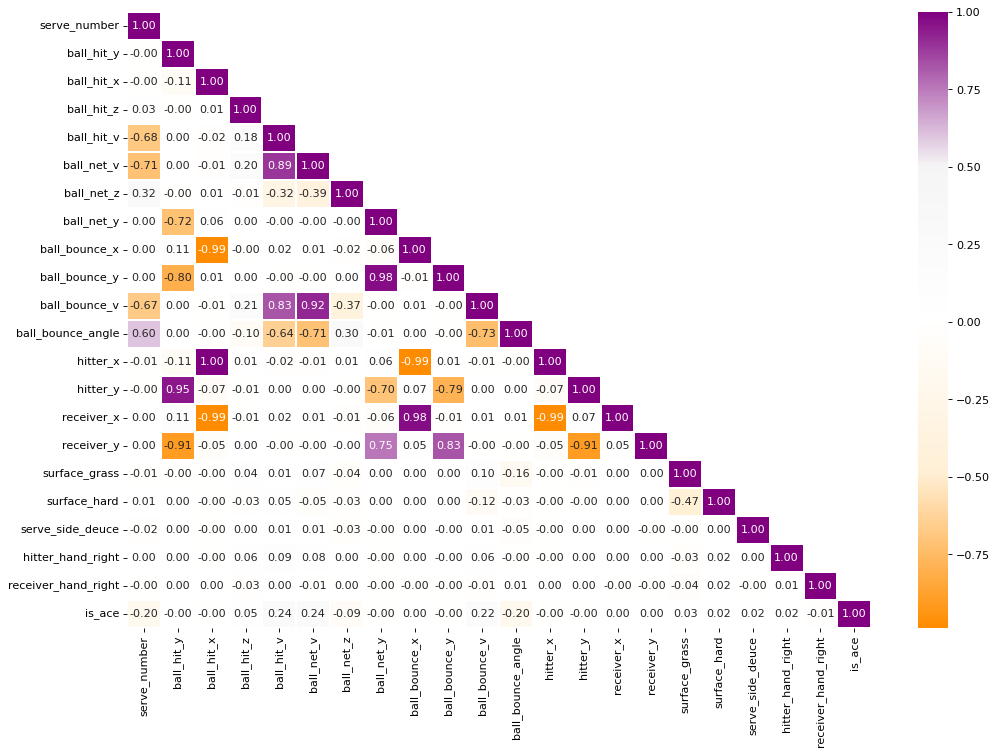

In [ ]:
# Define a customized colormap

## Define the number of colors in the colormap
num_colors = 256
## Create a list of colors with the two defined colors as the endpoints
colors = ['darkorange', '#FFEFD5', 'white', '#F5F5F5',  'purple']
## Create a custom colormap with the defined colors
my_cmap = LinearSegmentedColormap.from_list('my_colormap', colors, num_colors)

# Calculation of the Spearman correlation
target = 'is_ace'
df_ordered = pd.concat([df.drop(target,axis=1), df[target]],axis=1)
corr = df_ordered.corr()

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(15,10), dpi=80)
sns.heatmap(corr, mask=mask, annot=True, cmap=my_cmap, fmt='.2f', linewidths=0.2)
plt.show()

# Step 8 | Train-Test Split

In [ ]:
X = df.drop('is_ace', axis=1)
y = df['is_ace']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

The dataset is an imabalance dataset.
Let us see what percent of 'is_ace' in the dataset

In [ ]:
print(f"there is {round(sum(y)/len(y)*100, 2)} % of aces in the whole dataset")
print(f"After stratify, there is {round(sum(y_train)/len(y_train)*100, 2)} % of aces in the train dataset")
print(f"After stratify, there is {round(sum(y_test)/len(y_test)*100, 2)} % of aces in the test dataset")

there is 8.05 % of aces in the whole dataset
After stratify, there is 8.05 % of aces in the train dataset
After stratify, there is 8.05 % of aces in the test dataset


# Step 9 | XG Boost Model Building and parameter tuning

In [ ]:
#Round1
param_grid = {
    'gamma':[0, 0.25, 1.0],
    'learning_rate': [0.05, 0.01, 0.1],
    'max_depth':[4, 5, 6],
    'reg_lambda': [0.1, 1.0, 10.0],
    'scale_pos_weight': [0.8, 1, 3, 5]
}
#Round1 best parameters are : {'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 6, 'reg_lambda': 1.0, 'scale_pos_weight': 3}
# 1h:30min


In [ ]:
#Round2
param_grid = {
    'gamma':[0.25],
    'learning_rate': [0.1, 0.4, 0.6],
    'max_depth':[6, 7, 8],
    'reg_lambda': [0.5, 1.0, 3.0],
    'scale_pos_weight': [3]
}
#Round2 best parameters are : {'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 7, 'reg_lambda': 3.0, 'scale_pos_weight': 3}
#6 mins


In [ ]:
# optimal_params = GridSearchCV(
#     estimator=XGBClassifier(objective='binary:logistic',
#                             random_state = 42,
#                             subsample = 0.9,
#                             colsample_bytree=0.5,
#                             early_stopping_rounds = 10,
#                             eval_metric='aucpr'#auc
#                             ),
#     param_grid=param_grid,
#     scoring='roc_auc',
#     verbose=0,
#     n_jobs=10,
#     cv=5
# )

In [ ]:
# optimal_params.fit(X_train,
#                    y_train,
#                    eval_set=[(X_test, y_test)],
#                    verbose=False)
# print(optimal_params.best_params_)

{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 7, 'reg_lambda': 3.0, 'scale_pos_weight': 3}


# Step 10 | XG Boost Model Run and Evaluation

In [ ]:
clf_xgb = XGBClassifier(objective='binary:logistic',
                        eval_metric='aucpr',
                        seed = 42,
                        early_stopping_rounds = 10,
                        subsample = 0.9,
                        colsample_bytree=0.5,
                        gamma = 0.25,
                        learning_rate = 0.1,
                        max_depth = 6,
                        reg_lambda = 1.0,
                        scale_pos_weight = 3)
# clf_xgb = XGBClassifier(objective='binary:logistic',
#                         eval_metric='aucpr',
#                         seed = 42,
#                         early_stopping_rounds = 10,
#                         subsample = 0.9,
#                         colsample_bytree=0.5,
#                         gamma = 0.25,
#                         learning_rate = 0.1,
#                         max_depth = 7,
#                         reg_lambda = 3.0,
#                         scale_pos_weight = 3)
clf_xgb.fit(
    X_train,
    y_train,
    verbose=True,
    eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.48793
[1]	validation_0-aucpr:0.52948
[2]	validation_0-aucpr:0.55547
[3]	validation_0-aucpr:0.56973
[4]	validation_0-aucpr:0.57801
[5]	validation_0-aucpr:0.58165
[6]	validation_0-aucpr:0.58537
[7]	validation_0-aucpr:0.58640
[8]	validation_0-aucpr:0.59017
[9]	validation_0-aucpr:0.59286
[10]	validation_0-aucpr:0.59358
[11]	validation_0-aucpr:0.59473
[12]	validation_0-aucpr:0.59782
[13]	validation_0-aucpr:0.60054
[14]	validation_0-aucpr:0.60215
[15]	validation_0-aucpr:0.60789
[16]	validation_0-aucpr:0.61081
[17]	validation_0-aucpr:0.61260
[18]	validation_0-aucpr:0.61524
[19]	validation_0-aucpr:0.61747
[20]	validation_0-aucpr:0.61990
[21]	validation_0-aucpr:0.62158
[22]	validation_0-aucpr:0.62218
[23]	validation_0-aucpr:0.62316
[24]	validation_0-aucpr:0.62570
[25]	validation_0-aucpr:0.62620
[26]	validation_0-aucpr:0.62925
[27]	validation_0-aucpr:0.63041
[28]	validation_0-aucpr:0.63245
[29]	validation_0-aucpr:0.63345
[30]	validation_0-aucpr:0.63504
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro'),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[::,1], average='macro')],
                          index=['Accuracy','Macro Precision','Macro Recall','Macro F1-score','Macro AUC'],
                          columns = [model_name])

    result = (result * 100).round(2).astype(str) + '%'
    return result

In [ ]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports and confusion matrix
    '''
    # purple_cmap = colors.LinearSegmentedColormap.from_list("Green", ["Green", "red"])

    # Set font scale
    sns.set(font_scale=1.5)

    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    print('\n')

    # Create figure and subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, dpi=90, figsize=(12, 5))

    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap="cividis", ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')
    ax1.grid(False)

    # Report desired results as a summary in the form of a table
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax2.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 3.6)
    table.set_fontsize(12)
    ax2.axis('tight')
    # Hide the axes
    ax2.axis('off')
    # set the title
    ax2.set_title('{} Performance Summary on Test Data'.format(model_name), fontsize=18)
    # Modify color
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('lightblue')

    plt.tight_layout()
    plt.show()


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.95      0.97    138160
           1       0.58      0.77      0.66     12093

    accuracy                           0.94    150253
   macro avg       0.78      0.86      0.81    150253
weighted avg       0.95      0.94      0.94    150253


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     34541
           1       0.56      0.70      0.62      3023

    accuracy                           0.93     37564
   macro avg       0.76      0.83      0.79     37564
weighted avg       0.94      0.93      0.93     37564





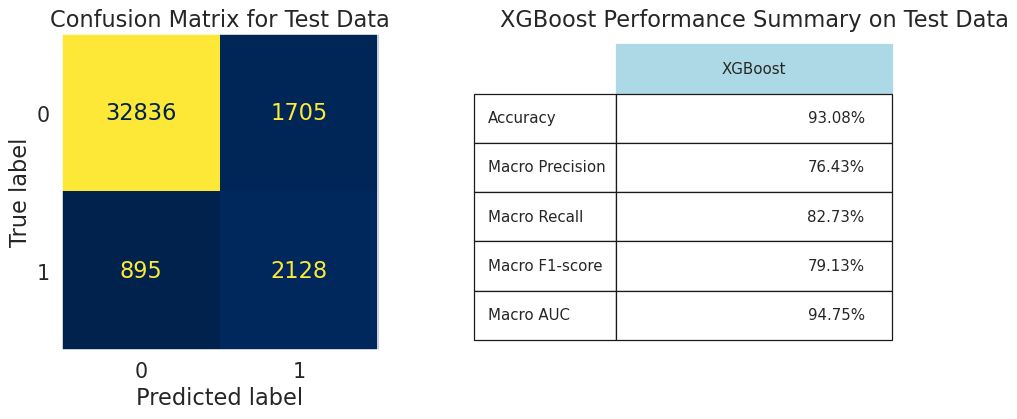

In [ ]:
model_evaluation(clf_xgb, X_train, X_test, y_train, y_test, 'XGBoost')

# Step 11 | Predict sample data points

In [ ]:
test_sample = X_test.iloc[0:10].copy()
predictions = clf_xgb.predict(test_sample)
test_sample['is_ace'] = predictions
test_sample

,serve_number,ball_hit_y,ball_hit_x,ball_hit_z,ball_hit_v,ball_net_v,ball_net_z,ball_net_y,ball_bounce_x,ball_bounce_y,...,hitter_x,hitter_y,receiver_x,receiver_y,surface_grass,surface_hard,serve_side_deuce,hitter_hand_right,receiver_hand_right,is_ace
14215,1,-1.006,11.218,2.904,122.8,96.4,1.148,0.631,-5.458,1.405,...,12.177,-1.110,-13.273,3.472,0,1,0,1,1,0
79685,1,0.892,11.264,2.736,112.4,88.8,1.227,-1.927,-5.728,-3.640,...,11.959,0.952,-13.615,-3.647,1,0,1,1,1,0
73731,2,1.232,11.646,2.862,102.2,77.6,1.317,-0.229,-5.518,-1.290,...,11.815,1.319,-12.868,-3.507,0,1,1,1,1,0
71434,1,0.766,11.138,2.831,134.7,106.6,1.081,0.142,-5.191,-0.178,...,11.816,1.040,-14.780,-3.272,0,1,1,1,1,1
93551,2,0.374,11.447,2.778,97.8,74.1,1.333,0.141,-5.404,-0.307,...,11.565,0.758,-16.336,-3.868,0,0,1,1,1,0
125666,1,1.088,-10.928,2.985,118.9,94.3,1.089,-2.443,4.540,-3.781,...,-11.446,1.142,13.985,-3.591,0,1,0,1,1,1
108888,2,-1.469,11.969,3.016,91.7,67.4,1.245,0.796,-4.070,1.217,...,11.973,-1.281,-15.518,3.075,0,0,0,1,0,0
169033,1,-1.246,11.268,2.714,119.8,93.7,1.099,-0.080,-5.358,0.384,...,11.667,-1.593,-13.909,3.561,0,1,0,1,1,0
6154,2,-0.295,11.133,3.237,117.4,92.0,1.225,2.609,-4.707,3.662,...,11.446,-0.650,-13.446,3.144,0,1,0,1,1,0
99863,2,1.153,-10.986,2.963,98.5,75.3,1.072,-1.811,3.887,-2.637,...,-11.371,1.019,16.469,-3.551,0,1,0,1,1,0
